In [22]:
#https://www.bmc.com/blogs/keras-neural-network-classification/
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

data = pd.read_csv('d:/data/diabetes.csv', delimiter=',')

In [2]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

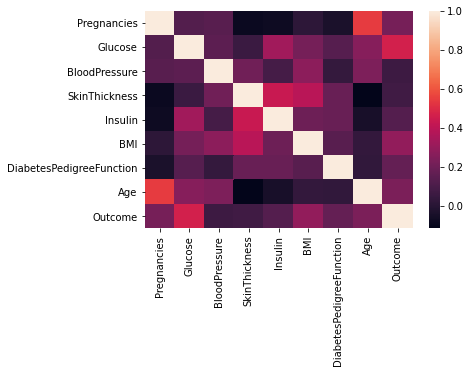

In [5]:
import seaborn as sns
import matplotlib as plt
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [6]:
data['BloodPressure'].corr( data["BMI"])

0.2818052888499106

In [7]:
data["Pregnancies"].corr(data["Age"])

0.544341228402339

In [8]:
import numpy as np

labels=data['Outcome']
features = data.iloc[:,0:8]

from sklearn.model_selection import train_test_split

X=features

y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)  

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(8,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
514/514 [==============================] - 1s 470us/step - loss: 0.6890 - accuracy: 0.5402
Epoch 2/4
514/514 [==============================] - 0s 447us/step - loss: 0.5694 - accuracy: 0.6820
Epoch 3/4
514/514 [==============================] - 0s 455us/step - loss: 0.5250 - accuracy: 0.6845
Epoch 4/4
514/514 [==============================] - 0s 473us/step - loss: 0.5054 - accuracy: 0.7146


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [13]:
for layer in model.layers:
    weights = layer.get_weights()

In [14]:
weights

[array([[-0.7681437 ],
        [ 0.6915931 ],
        [ 0.7005668 ],
        [-0.7593168 ],
        [ 0.1598716 ],
        [ 0.6335349 ],
        [-0.22738874],
        [ 0.31876707]], dtype=float32),
 array([-0.08570471], dtype=float32)]

In [16]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [19]:
#from keras.utils import plot_model
#plot_model(model, to_file='d:/data/model.png', show_shapes=True,)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [20]:
y_pred = model.predict_classes(X_test)

D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

8/8 [==============================] - 0s 998us/step - loss: 0.5198 - accuracy: 0.7323
[0.5197556018829346, 0.7322834730148315]


In [ ]:
# So, our predictive model is 73% accurate.